<a href="https://colab.research.google.com/github/disha2sinha/Movie-Recommendation-System/blob/master/Analysis_of_The_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import math
import numpy as np
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

**DATASET :**

In [3]:
id='1SYSewsuYmg4MeiRPaPMz_CxgBc6BB5gq'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('MoviesData.csv')  
movies_data = pd.read_csv('MoviesData.csv',engine='python',index_col=0)
movies_data.head()

,tmdbId,title,release_year,release_day,genres,original_language,runtime,content,production_companies,budget,revenue,production_countries,status,popularity,vote_average,vote_count,movieId,imdbId,cast,director,mean_rating
0,211672,Minions,2015,Wednesday,Family|Animation|Adventure|Comedy,English,91.0,"Minions Stuart, Kevin and Bob are recruited by...",Universal Pictures|Illumination Entertainment,74000000,1.156731e+09,United States of America,Released,547.488298,6.4,4729.0,135887,2293640,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda,3.135554
1,297762,Wonder Woman,2017,Tuesday,Action|Adventure|Fantasy,English,141.0,An Amazon princess comes to the world of Man t...,Dune Entertainment|Atlas Entertainment|Warner ...,149000000,8.205804e+08,United States of America,Released,294.337037,7.2,5025.0,143355,451279,Gal Gadot|Chris Pine|Robin Wright|Danny Huston...,Patty Jenkins,3.747344
2,321612,Beauty and the Beast,2017,Thursday,Family|Fantasy|Romance,English,129.0,A live-action adaptation of Disney's version o...,Walt Disney Pictures|Mandeville Films,160000000,1.262886e+09,United Kingdom|United States of America,Released,287.253654,6.8,5530.0,168366,2771200,Emma Watson|Dan Stevens|Luke Evans|Kevin Kline...,Bill Condon,3.585165
3,339403,Baby Driver,2017,Wednesday,Action|Crime,English,113.0,After being coerced into working for a crime b...,Big Talk Productions|TriStar Pictures|Media Ri...,34000000,2.245113e+08,United Kingdom|United States of America,Released,228.032744,7.2,2083.0,171763,3890160,Ansel Elgort|Lily James|Kevin Spacey|Jamie Fox...,Edgar Wright,3.973244
4,177572,Big Hero 6,2014,Friday,Adventure|Family|Animation|Action|Comedy,English,102.0,The special bond that develops between plus-si...,Walt Disney Pictures|Walt Disney Animation Stu...,165000000,6.521054e+08,United States of America,Released,213.849907,7.8,6289.0,115617,2245084,Scott Adsit|Ryan Potter|Daniel Henney|T.J. Mil...,Chris Williams,3.916242


In [4]:
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44941 entries, 0 to 44940
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tmdbId                44941 non-null  int64  
 1   title                 44941 non-null  object 
 2   release_year          44941 non-null  object 
 3   release_day           44941 non-null  object 
 4   genres                42557 non-null  object 
 5   original_language     44816 non-null  object 
 6   runtime               44941 non-null  float64
 7   content               44010 non-null  object 
 8   production_companies  33204 non-null  object 
 9   budget                44941 non-null  int64  
 10  revenue               44941 non-null  float64
 11  production_countries  38760 non-null  object 
 12  status                44941 non-null  object 
 13  popularity            44941 non-null  float64
 14  vote_average          44941 non-null  float64
 15  vote_count         

**REMOVING NULL AND SOME ODD VALUES FROM THE DATASET :**

In [5]:
movies_data=movies_data.replace(np.nan,'Unknown',regex=True)
movies_data['release_year']=movies_data['release_year'].replace('NaT','1874',regex=True)

In [6]:
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44941 entries, 0 to 44940
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tmdbId                44941 non-null  int64  
 1   title                 44941 non-null  object 
 2   release_year          44941 non-null  object 
 3   release_day           44941 non-null  object 
 4   genres                44941 non-null  object 
 5   original_language     44941 non-null  object 
 6   runtime               44941 non-null  float64
 7   content               44941 non-null  object 
 8   production_companies  44941 non-null  object 
 9   budget                44941 non-null  int64  
 10  revenue               44941 non-null  float64
 11  production_countries  44941 non-null  object 
 12  status                44941 non-null  object 
 13  popularity            44941 non-null  float64
 14  vote_average          44941 non-null  float64
 15  vote_count         

# **::DATA VISUALIZATION AND ANALYSIS ::**

In [7]:
def count_types(data,column,array):
  type_count=dict()
  for item in array:
    type_count[item]=0
  for types in movies_data[column].str.split('|'):
    for item in types: 
      type_count[item] += 1
  type_occurences = []
  for k,v in type_count.items():
    type_occurences.append([k,v])
  type_occurences.sort(key = lambda x:x[1], reverse = True)
  return type_occurences

**DISTRIBUTION OF GENRES IN THE DATASET:** We will plot the various unique genres and get an idea of how many movies in the dataset have those genres.

In [8]:
genre_set = set()
for genre in movies_data['genres'].str.split('|').values:
  genre_set = genre_set.union(set(genre))
genre_type_occurences= count_types(movies_data, 'genres', genre_set)
len(genre_type_occurences)


21

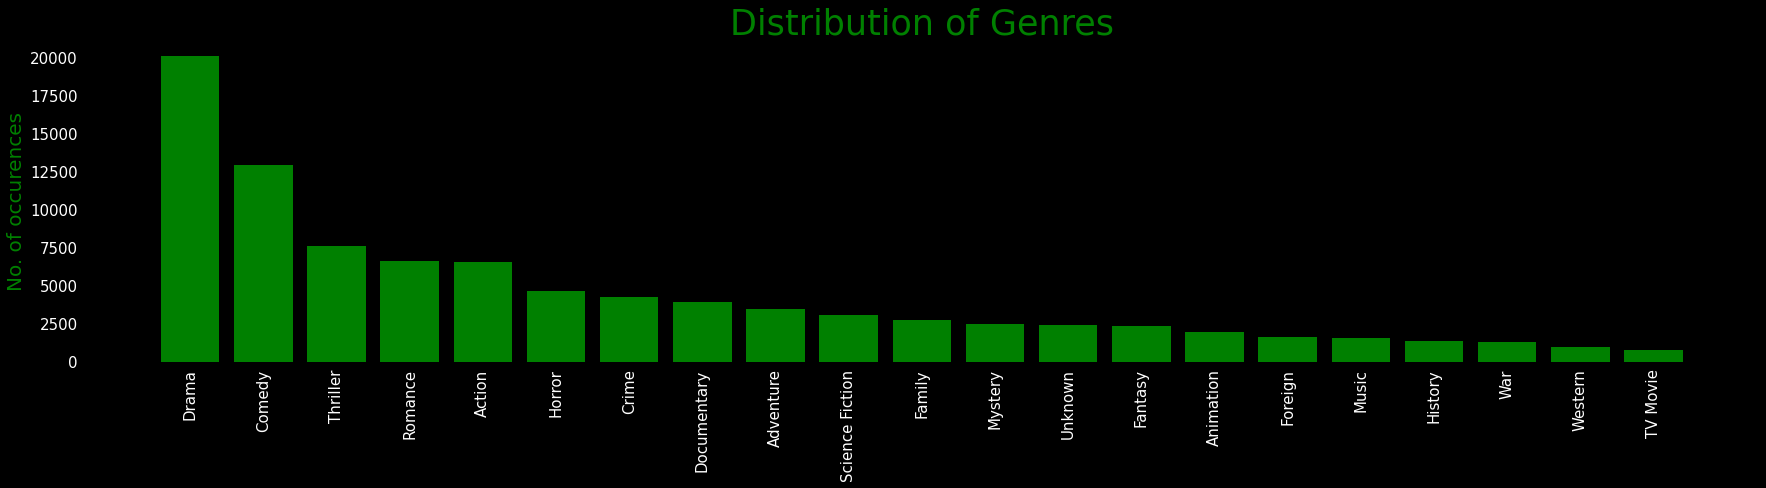

In [9]:
fig = plt.figure(1, figsize=(30,13),facecolor='k')
genre_plot = fig.add_subplot(2,1,2)
genre_plot.set_facecolor((0,0,0))
y_axis = [i[1] for i in genre_type_occurences]
x_axis = [k for k,i in enumerate(genre_type_occurences)]
x_label = [i[0] for i in genre_type_occurences]
plt.xticks(color='w',rotation=90, fontsize = 15)
plt.yticks(fontsize = 15,color='w')
plt.xticks(x_axis, x_label)
plt.ylabel("No. of occurences", fontsize = 20,color='g')
genre_plot.bar(x_axis, y_axis, color='g')
plt.title("Distribution of Genres",color='g',fontsize = 35)
plt.show()

So seeing the bar plot..it's clear that most movies belong to the 'Drama' genre.

 **DISTRIBUTION OF PRODUCTION COUNTRIES IN THE DATASET:** WordCloud is used to see the distribution of countries whose movies are in the dataset.

In [10]:
PH_set = set()
for PH in movies_data['production_countries'].str.split('|').values:
  PH_set = PH_set.union(set(PH))
PHtype_occurences= count_types(movies_data, 'production_countries', PH_set)
len(PHtype_occurences)


160

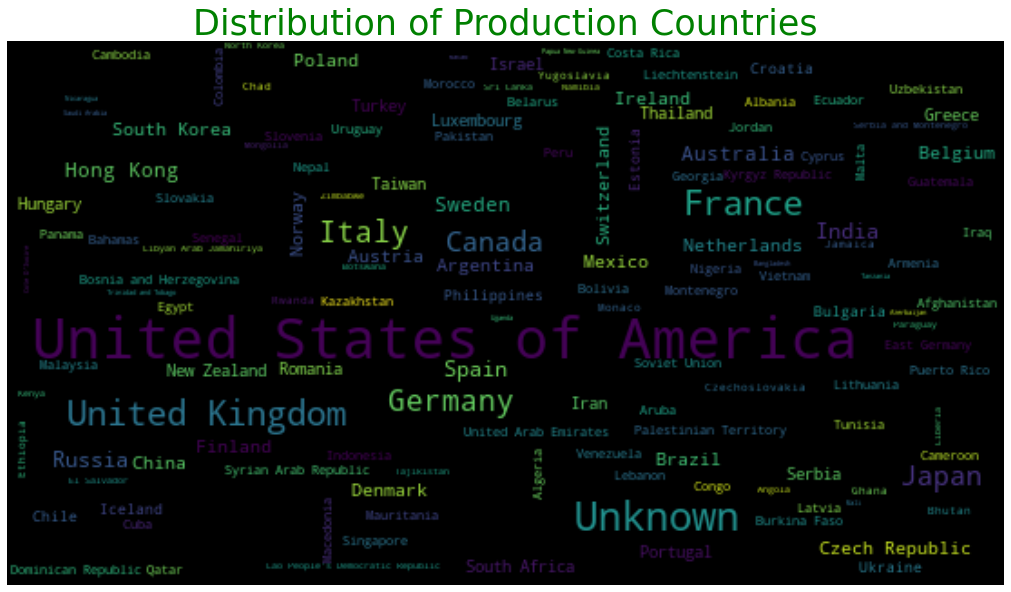

In [11]:
countries = dict()
for s in PHtype_occurences:
    countries[s[0]] = s[1]
tone = 100 # define the color of the words
f, ax = plt.subplots(figsize=(30, 10))
wordcloud = WordCloud(width=550,height=300, background_color='black', 
                      max_words=1628,relative_scaling=0.4,
                      normalize_plurals=False)
wordcloud.generate_from_frequencies(countries)
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("Distribution of Production Countries",color='g',fontsize = 35)
plt.axis('off')
plt.show()

From the plot..it's clear that movies of 'United States of Kingdom' is huge in numbers. Also there are many movies in the dataset whose country of origin is unknown

 **DISTRIBUTION OF PRODUCTION COMPANIES IN THE DATASET:** WordCloud is used to see the distribution of PHs whose movies are in the dataset.

In [12]:
PHc_set = set()
for PHc in movies_data['production_companies'].str.split('|').values:
  PHc_set = PHc_set.union(set(PHc))
PHctype_occurences= count_types(movies_data, 'production_companies', PHc_set)
len(PHctype_occurences)


23412

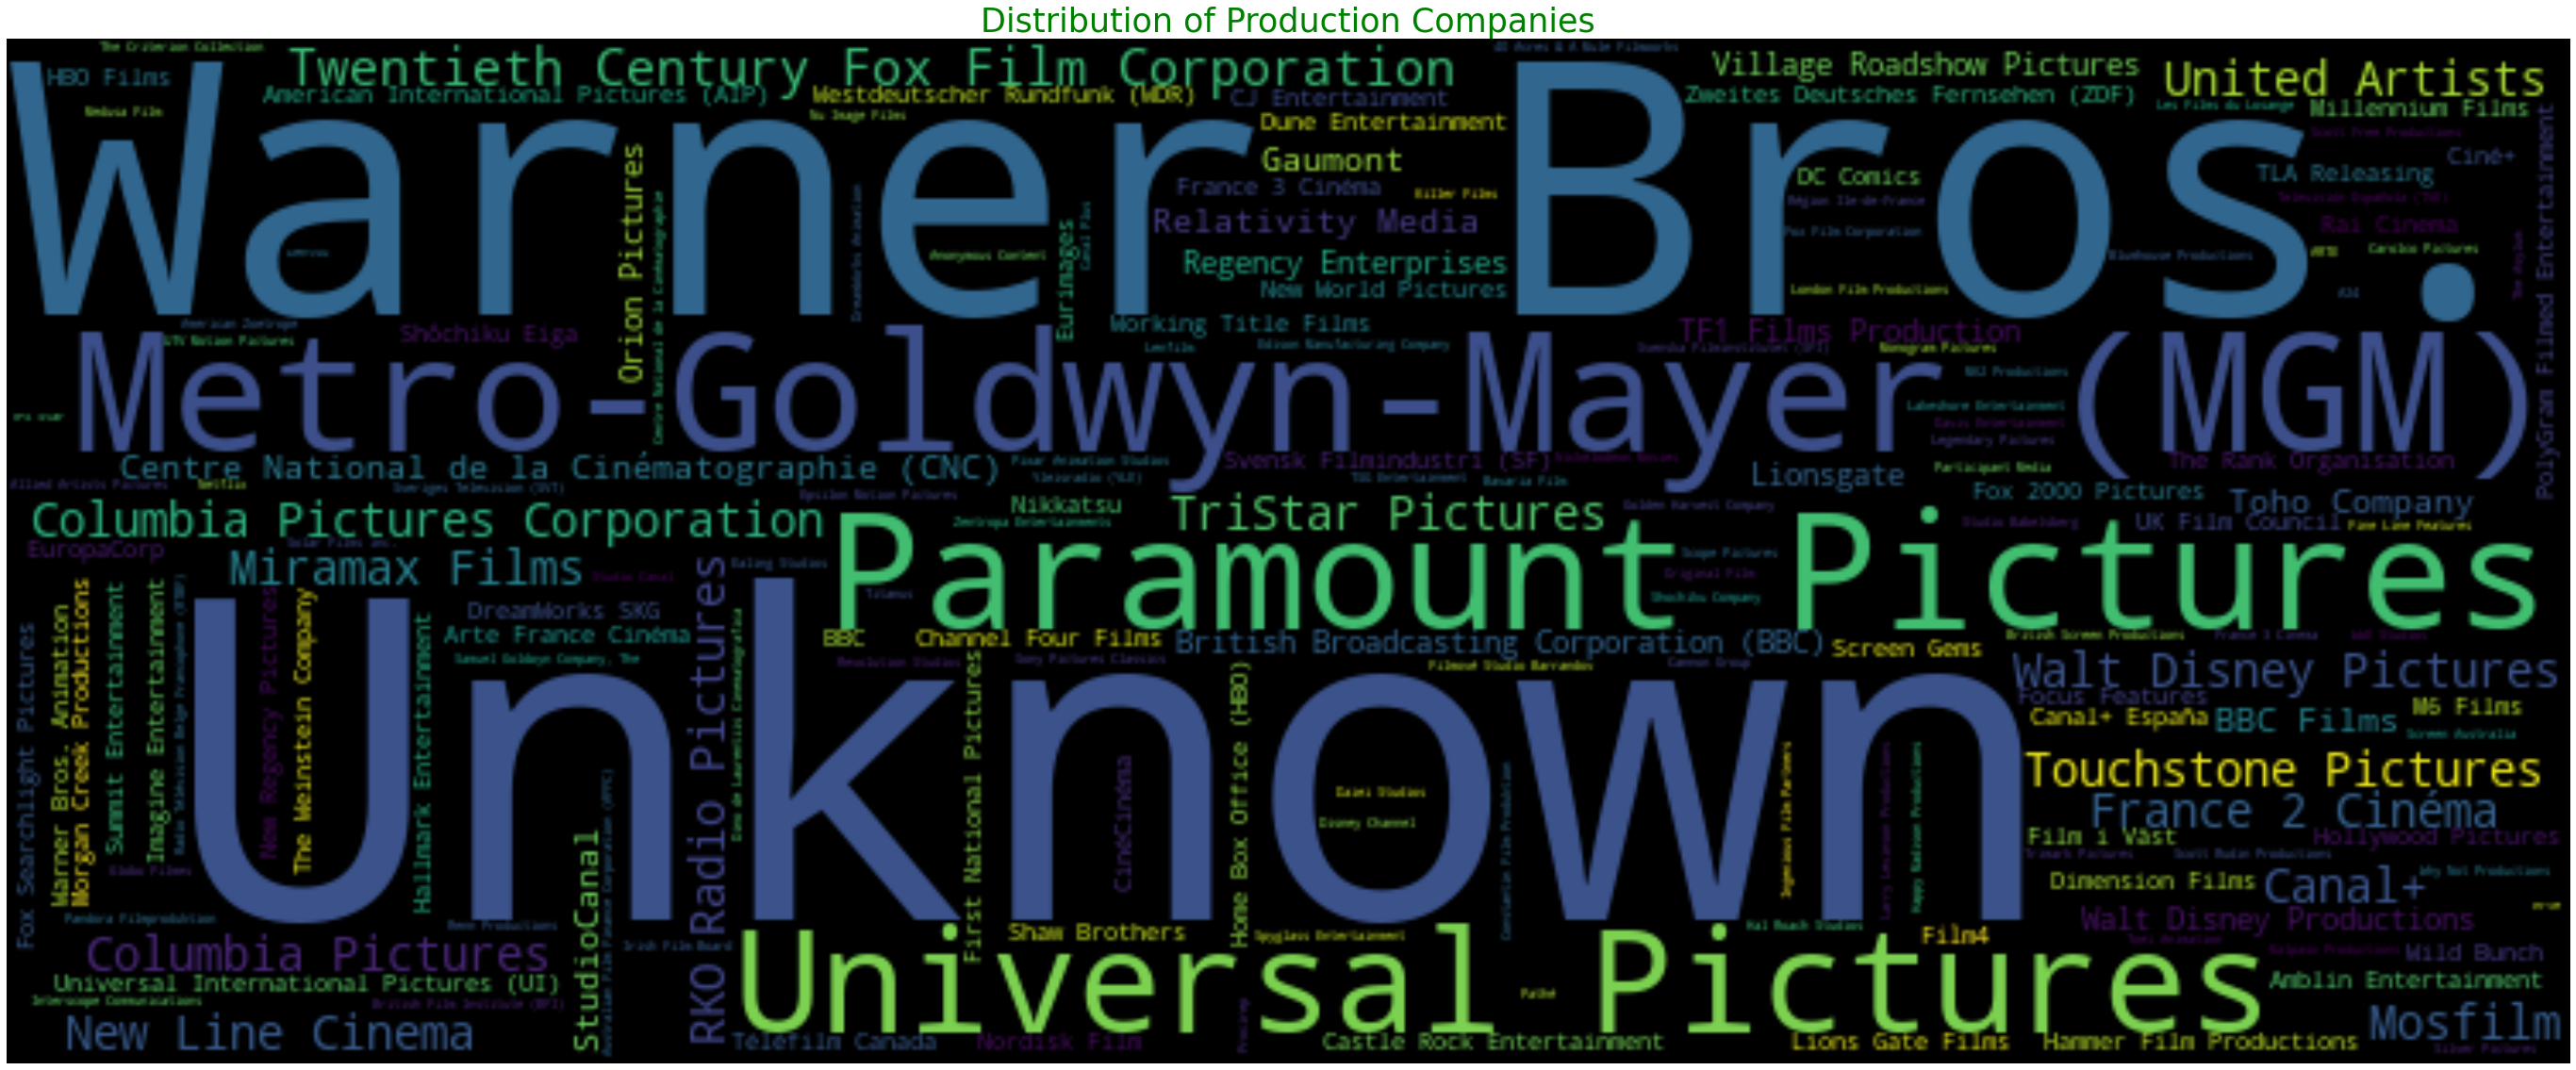

In [13]:
companies = dict()
for s in PHctype_occurences:
    companies[s[0]] = s[1]
tone = 100 # define the color of the words
f, ax = plt.subplots(figsize=(50, 20))
wordcloud = WordCloud(width=750,height=300, background_color='black', 
                      max_words=23412,relative_scaling=0.1,
                      normalize_plurals=False)
wordcloud.generate_from_frequencies(companies)
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("Distribution of Production Companies",color='g',fontsize = 35)
plt.axis('off')
plt.show()

From the wordcloud it's clear that huge number of movies belong to 'Warner Bros' and also PHs of huge number of movies are unknown.

 **DISTRIBUTION OF YEAR OF RELEASE IN THE DATASET:**

In [14]:
year_set = set()
for year in movies_data['release_year'].str.split('|').values:
  year_set = year_set.union(set(year))
year_type_occurences= count_types(movies_data, 'release_year', year_set)
len(year_type_occurences)


135

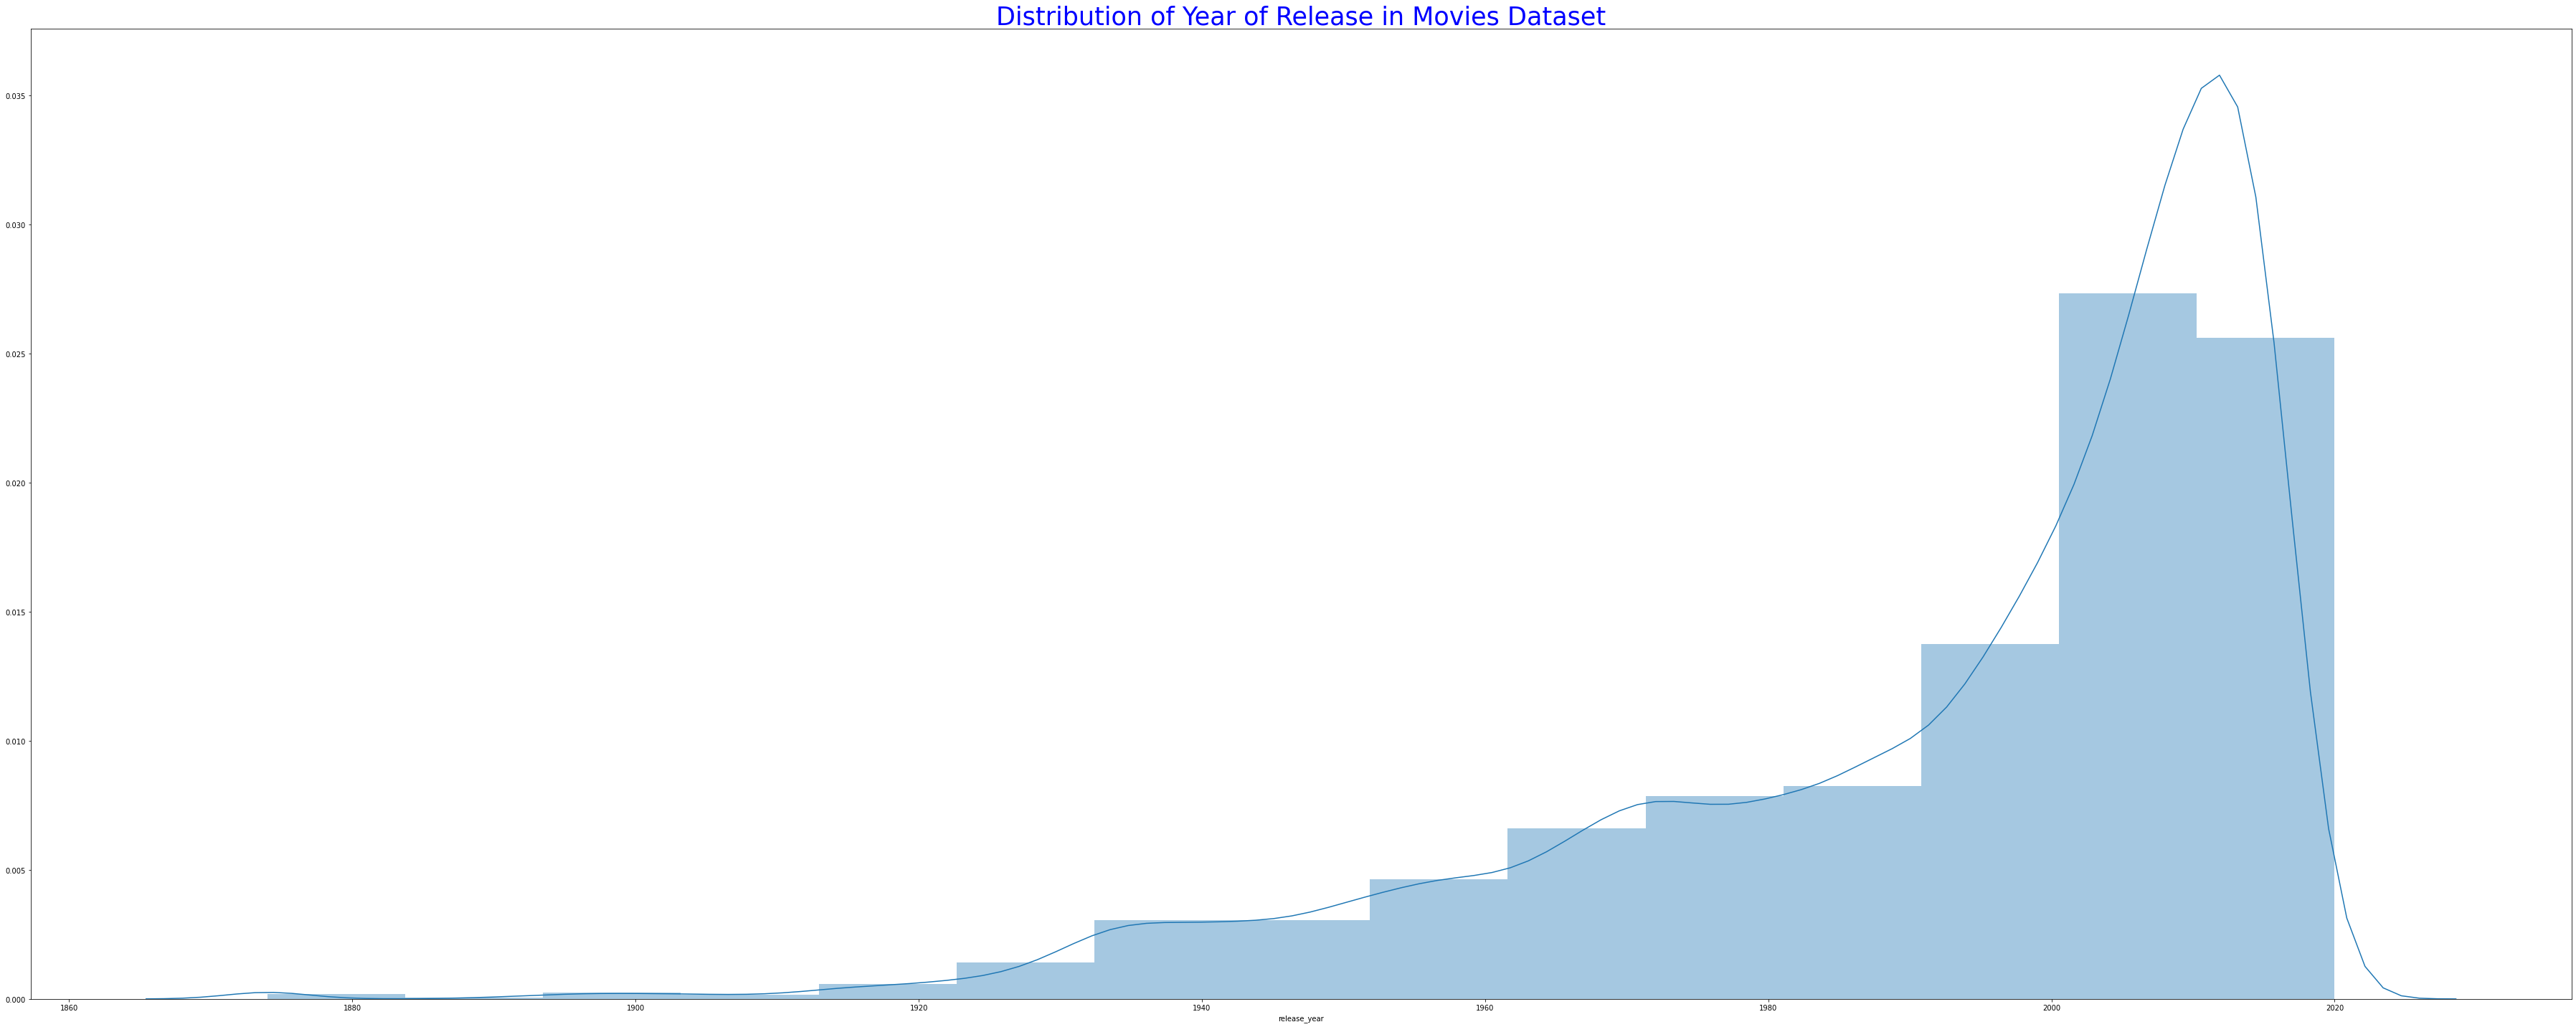

In [15]:
fig, axes = plt.subplots(figsize=(50, 20))
sns.distplot(movies_data['release_year'],bins=15)
plt.title("Distribution of Year of Release in Movies Dataset",color='b',fontsize = 35)
plt.tight_layout()

So most of the movies are from the period '2000' to '2020'.

 **DISTRIBUTION OF DAY OF RELEASE IN THE DATASET:**

In [16]:
day_set = set()
for day in movies_data['release_day'].str.split('|').values:
  day_set = day_set.union(set(day))
day_type_occurences= count_types(movies_data, 'release_day', day_set)

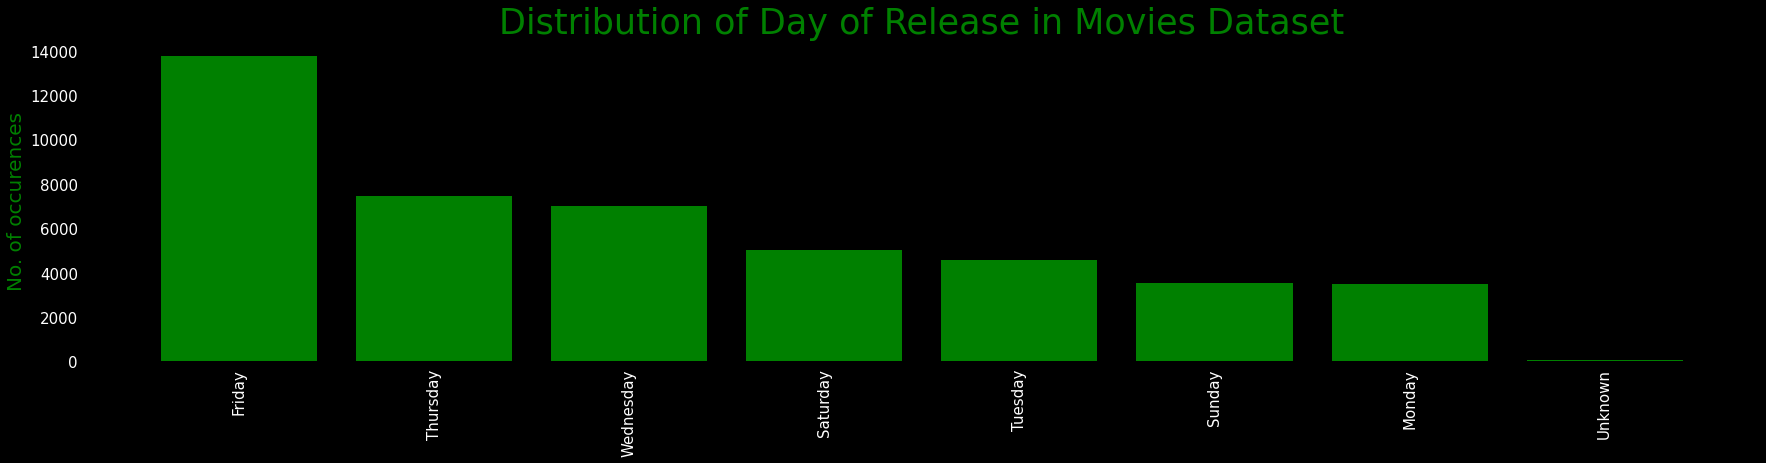

In [17]:
fig = plt.figure(1, figsize=(30,13),facecolor='k')
day_plot = fig.add_subplot(2,1,2)
day_plot.set_facecolor((0,0,0))
y_axis = [i[1] for i in day_type_occurences]
x_axis = [k for k,i in enumerate(day_type_occurences)]
x_label = [i[0] for i in day_type_occurences]
plt.xticks(color='w',rotation=90, fontsize = 15)
plt.yticks(fontsize = 15,color='w')
plt.xticks(x_axis, x_label)
plt.ylabel("No. of occurences", fontsize = 20,color='g')
day_plot.bar(x_axis, y_axis, color='g')
plt.title("Distribution of Day of Release in Movies Dataset",color='g',fontsize = 35)
plt.show()

Most of the movies in the dataset released on Friday

In [19]:
movies_data['runtime'].min()

0.0

In [20]:
movies_data['runtime'].max()


1256.0

In [25]:
sns.plot(data=movies_data,y='mean_rating',x='runtime')

AttributeError: ignored